In [1]:
from data import SequenceDataset
from model2 import LSTM
from main import *
from torch.utils.data import DataLoader
from utils import *
import pandas as pd
import torch
import numpy as np
import random

In [2]:
import xgboost as xgb

In [3]:
fix_seed = 2021
random.seed(fix_seed)
torch.manual_seed(fix_seed)
np.random.seed(fix_seed)

In [4]:
df = pd.read_csv(r'F:\ML_Bootcamp\LTSF-Linear\dataset\test.csv')
df = preprocess_data(df)
target = 'Close'
features = list(df.columns)
train_size = int(len(df)*.8)
train_df = df[:train_size]
test_df = df[train_size:]
#scaled_train_df, scalers = scale_df(train_df)
#scaled_test_df = apply_scalers(test_df, scalers)

In [5]:
train_dataset = SequenceDataset(train_df, target, features)
test_dataset = SequenceDataset(test_df, target, features)

In [6]:
train_loader = DataLoader(train_dataset, batch_size=None, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=None, shuffle=False)

In [7]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.01)

In [8]:
X_train, y_train = np.empty((0, 105)), np.empty((0, 7))
for X, y in train_loader:
    X_0 = np.array([])
    for i in range(len(X)):
        X_0 = np.concatenate((X_0, X[i].numpy()))
    X_train = np.concatenate((X_train, [X_0]), axis=0)
    y_train = np.concatenate((y_train, [y.numpy()]), axis=0)

In [9]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [10]:
X_test, y_test = np.empty((0, 105)), np.empty((0, 7))
for X, y in test_loader:
    X_0 = np.array([])
    for i in range(len(X)):
        X_0 = np.concatenate((X_0, X[i].numpy()))
    X_test = np.concatenate((X_test, [X_0]), axis=0)
    y_test = np.concatenate((y_test, [y.numpy()]), axis=0)

In [11]:
predictions = model.predict(X_test)

In [12]:
preds = torch.transpose(torch.Tensor(predictions), 0, 1)

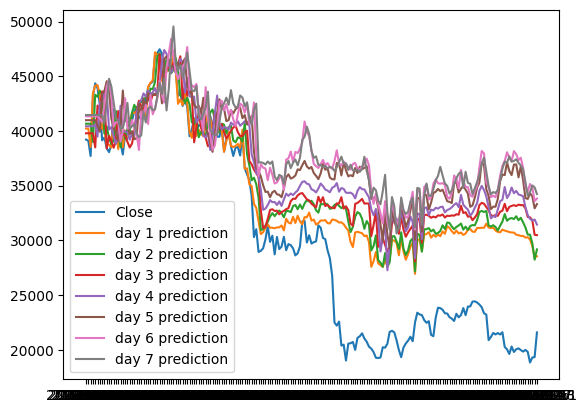

In [13]:
df_2 = test_df.copy()
Y_plot = ['Close']
for i in range(7):
    new_pred = preds[i]
    if i != 0:
        new_pred = new_pred[:-i]
        for k in range(i):
            new_pred = torch.cat((torch.tensor([new_pred[0]]), new_pred))
    df_2["day " + str(i+1) + " prediction"] = new_pred.numpy()
    Y_plot.append("day " + str(i+1) + " prediction")

plt.plot(df_2.index, df_2[Y_plot])
plt.legend(Y_plot)
plt.show()

In [14]:
df_2.head()

,Open,Close,High,Low,Volume,day 1 prediction,day 2 prediction,day 3 prediction,day 4 prediction,day 5 prediction,day 6 prediction,day 7 prediction
date,,,,,,,,,,,,
2022-02-25,38333.746094,39214.218750,39630.324219,38111.343750,2.654560e+10,40222.671875,40659.222656,39786.156250,40429.164062,40983.671875,41337.585938,41453.5625
2022-02-26,39213.082031,39105.148438,40005.347656,38702.535156,1.746755e+10,40222.671875,40659.222656,39786.156250,40429.164062,40983.671875,41337.585938,41453.5625
2022-02-27,39098.699219,37709.785156,39778.941406,37268.976563,2.345013e+10,38539.277344,40660.191406,39786.156250,40429.164062,40983.671875,41337.585938,41453.5625
2022-02-28,37706.000000,43193.234375,43760.457031,37518.214844,3.569001e+10,43412.496094,38986.906250,39783.109375,40429.164062,40983.671875,41337.585938,41453.5625
2022-03-01,43194.503906,44354.636719,44793.601563,42952.585938,3.247905e+10,44149.460938,43311.089844,38495.714844,40601.609375,40983.671875,41337.585938,41453.5625
